# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Bias-variance tradeoff
Week 3 | Lesson 2.1



### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Define bias and variance at an intuitive level
- Explain a model's error in terms of bias and variance


### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Introduction](#introduction)   |  The bias-variance tradeoff |
| 20 min  | [Demo ](#demo)  | SSE and bias, variance, and irreducible error  |
| 10 min  | [Stop + jot ](#demo)  | Conceptual and visual demonstration  |
| 45 min  | [Guided Practice](#demo)  | Visualizing bias and variance  |

---


## Quantifying error

We want to minimize the predictive error of our models. (I.e. we need an objective function.) How do we quantify the error in our model?

One metric: Sum of Squared Errors (SSE)

$$ SSE = \sum_{i=1}^{n}(y_i - f(x_i))^2 = \sum_{i=1}^{n}(y_i - \hat y)^2 $$

$x_i$ -- a given x value

$y_i$ -- actual y value

$f(x_i)$-- the model's predicted y value

$\hat y $ -- predicted y value

### SSE can be decomposed<sup>1</sup> into error due to Bias and Variance


$$SSE \sim E(y_i - \hat{f}(x_i))^2 = Var(\hat{f}(x_i))\ + [Bias(\hat{f}(x_i))]^2 + Var(\epsilon)$$

Bias?
*Your model makes assumptions about the shape of the data and consistently gets it wrong as it is run on new sample data.*

Variance?
*Imagine building your model many times, on different slices of data. Variance is related to how much your predictions for a given $x_i$ differ each time you make a prediction*

<sup>1</sup>See the derivation of this result [here](https://theclevermachine.wordpress.com/tag/bias-variance-decomposition/)

### Graphical Representation
Imagine each dart throw is a new prediction *for a single data point $x_i$*.
![](./assets/images/bullseyes.png)

(Image from http://scott.fortmann-roe.com/docs/BiasVariance.html)

**A high-bias model**
![](./assets/images/linear-fit-quadratic.png)

**If we increase the complexity, the bias decreases**
![](./assets/images/quadratic-fit-quadratic.png)

All datasets contain error. Here's a subset of that same data with one error point as an outlier

We can fit a high-degree polynomial to these points to fit the training set perfectly.
![](./assets/images/variance_1.png)

However, when we repeat that model fit on new data, our prediction makes errors. This is error due to variance. 
![](./assets/images/variance_2.png)

## The tradeoff:

![](https://camo.githubusercontent.com/be96d619bff8883343cf541ed1405a8f7f5991cc/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f6d6174682f632f622f632f63626336353331306430396136656661363330643863316633336364666138382e706e67)
![](https://camo.githubusercontent.com/34d8f46b4220c71b359f55db15ed9124474b397d/687474703a2f2f73636f74742e666f72746d616e6e2d726f652e636f6d2f646f63732f646f63732f4269617356617269616e63652f6269617376617269616e63652e706e67)

## Conceptual definition
Take 5 minutes to read the definition of error from "bias" and from "variance" at this link:
http://scott.fortmann-roe.com/docs/BiasVariance.html

Jot down a definition for each in your own words, and draw at least two illustrative models: a high-variance model, and a high-bias model.

### Here's sample code for getting variance and bias from an sklearn model

```python
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

yhat = regr.predict(X)
sse = np.mean((np.mean(yhat) - Y) ** 2)
var = np.var(yhat)
bias = sse - var - 0.01
```

Note that the way this is written implies fitting the model just once; strictly speaking, we conceptualize the bias and variance as calculated by fitting the same model many times on new data. In practice this is hard to compute.

## Guided practice


We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

We'll investigate fitting functions of the form $f(x) = a + b * x^n$ to some cubic data with noise.


Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investiage the bias and variance as the data source changes in complexity

## Some helper functions
The following functions will generate data and polynomial values.

In [47]:
%matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [48]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [49]:
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
mu, sigma = 0, 0.1 # mean and standard deviation for the random error component
# norm = np.random.normal(mu, sigma)

# Generate some data for the formula below
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3 + \epsilon$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4, ..., 9$.

Coefficients: -0.0358
Variance score: 0.00
Residual sum of squares: 0.85
Bias: 0.844004701577
Variance: 0.000406776764088


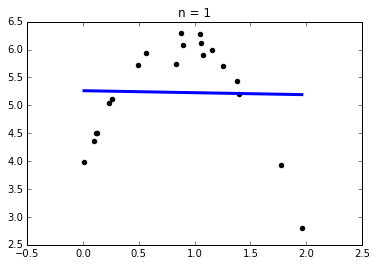

Coefficients: -0.2900
Variance score: 0.11
Residual sum of squares: 0.85
Bias: 0.752353693453
Variance: 0.0920577848875


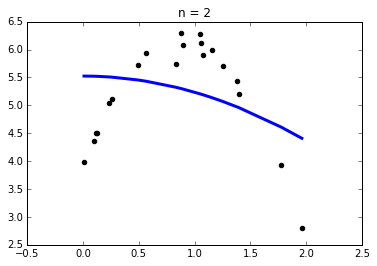

Coefficients: -0.2415
Variance score: 0.26
Residual sum of squares: 0.85
Bias: 0.623850878345
Variance: 0.220560599996


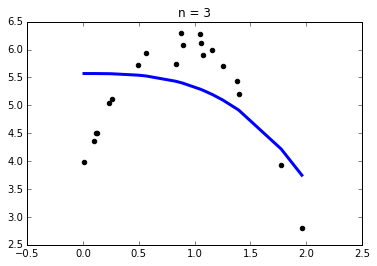

Coefficients: -0.1513
Variance score: 0.36
Residual sum of squares: 0.85
Bias: 0.53331241584
Variance: 0.311099062501


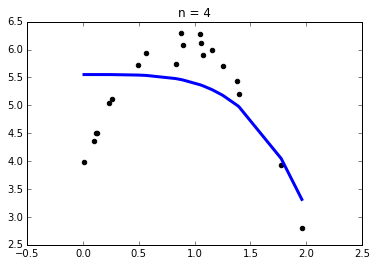

Coefficients: -0.0854
Variance score: 0.43
Residual sum of squares: 0.85
Bias: 0.480662799071
Variance: 0.36374867927


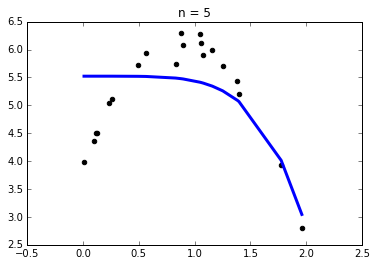

Coefficients: -0.0461
Variance score: 0.46
Residual sum of squares: 0.85
Bias: 0.452739235152
Variance: 0.391672243189


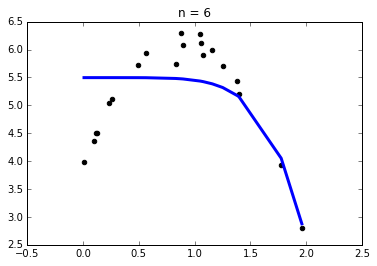

Coefficients: -0.0243
Variance score: 0.47
Residual sum of squares: 0.85
Bias: 0.439362494255
Variance: 0.405048984086


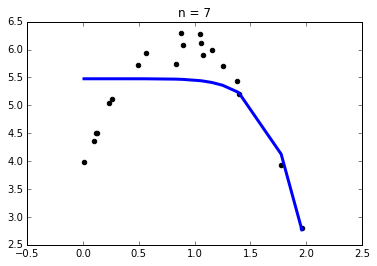

Coefficients: -0.0126
Variance score: 0.48
Residual sum of squares: 0.85
Bias: 0.434316588745
Variance: 0.410094889596


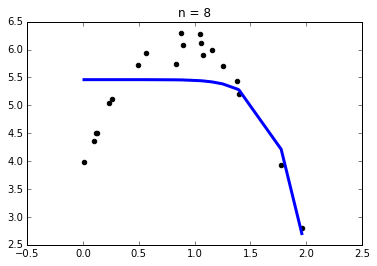

Coefficients: -0.0065
Variance score: 0.48
Residual sum of squares: 0.85
Bias: 0.434026833321
Variance: 0.41038464502


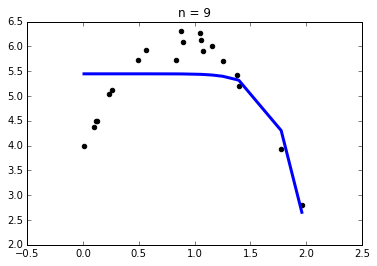

In [51]:
# Workbook code

domain = np.array([x[0] for x in data]) # The x values we're "observing"
Y = np.array([x[1] for x in data]) # The values we are trying to predict


for i in range(1, 10):
    X = monomials(domain, i) 
    # Create linear regression object and fit it to X and Y
    regr = linear_model.LinearRegression().fit(X,Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01 #0.01 is the irreducible error, is variance of the random error from above (sd**2)
    
    # The coefficients
    print('Coefficients: %.4f' % regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to **note that the true measures of bias and variance are averaged over many fits of a model to many samples from the same data source, and we're only looking at one instance here** as illustration.

The bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

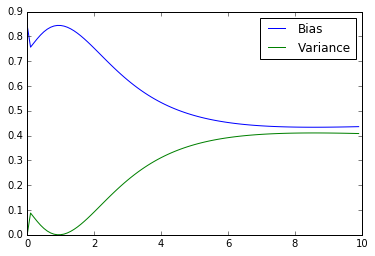

In [52]:
# Workbook code

bs = [] #list of biases
vars_ = [] #list of variances
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
     
    regr = regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    
    bs.append(bias)
    vars_.append(var)

#Plot the variance and bias
plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars_, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Independent practice

Now let's look at some situations where adding more polynomial terms decreases both bias and variance.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what is different from the code above?

Coefficients: -0.0358 
Variance score: 0.00
Residual sum of squares: 0.85
Bias: 0.844004701577
Variance: 0.000406776764088


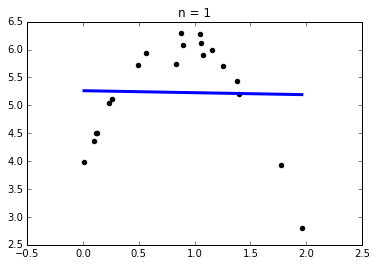

Coefficients: 4.9383 -2.8187 
Variance score: 0.98
Residual sum of squares: 0.85
Bias: 0.0059014006942
Variance: 0.838510077647


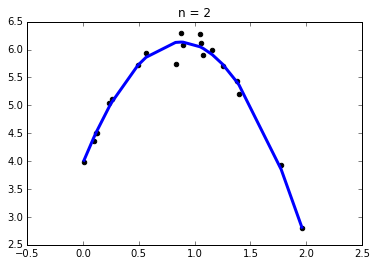

Coefficients: 5.0463 -2.9617 0.0483 
Variance score: 0.98
Residual sum of squares: 0.85
Bias: 0.00585219215758
Variance: 0.838559286183


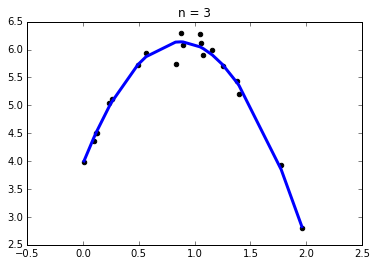

Coefficients: 5.4022 -3.8222 0.7517 -0.1816 
Variance score: 0.98
Residual sum of squares: 0.85
Bias: 0.00567981310947
Variance: 0.838731665231


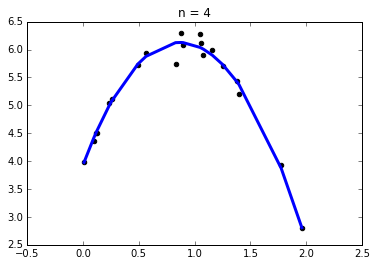

Coefficients: 5.7671 -5.2512 2.7921 -1.3871 0.2501 
Variance score: 0.98
Residual sum of squares: 0.85
Bias: 0.00559093970373
Variance: 0.838820538637


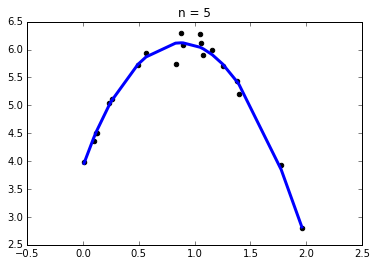

Coefficients: 6.6842 -10.5468 14.2321 -12.6538 5.3838 -0.8782 
Variance score: 0.98
Residual sum of squares: 0.85
Bias: 0.0052838929848
Variance: 0.839127585356


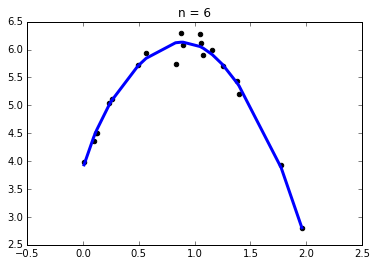

Coefficients: 2.3983 25.8879 -101.2908 160.5703 -127.3437 49.3553 -7.4424 
Variance score: 0.99
Residual sum of squares: 0.85
Bias: 0.00229719392589
Variance: 0.842114284415


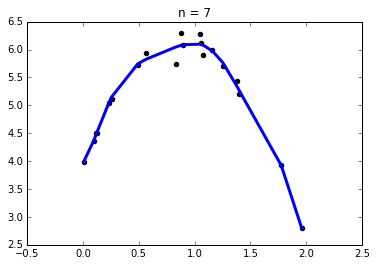

Coefficients: 3.0933 18.1283 -68.1394 90.9116 -47.8056 -0.9152 9.0642 -2.1947 
Variance score: 0.99
Residual sum of squares: 0.85
Bias: 0.00225956310283
Variance: 0.842151915238


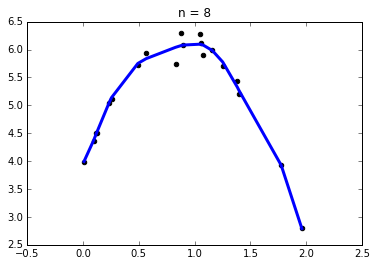

Coefficients: 7.2296 -46.4394 321.1374 -1072.5681 1883.7065 -1865.9300 1049.3306 -312.5091 38.2662 
Variance score: 0.99
Residual sum of squares: 0.85
Bias: 0.00149242282349
Variance: 0.842919055517


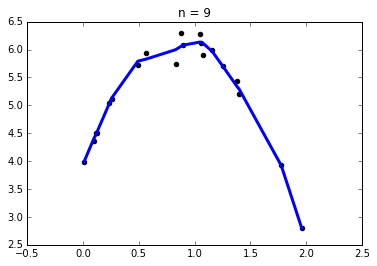

In [53]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print 'Coefficients:',
    for b in ['%.4f' % b for b in regr.coef_]: print b,
    # Explained variance score: 1 is perfect prediction
    print('\nVariance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

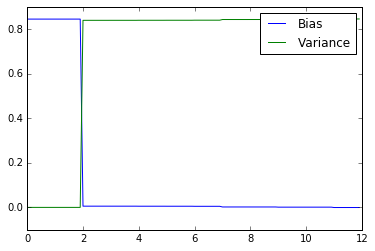

In [54]:
bs = [] # bias values
vars = [] # variance values
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01 #0.01 is the irreducible error, is variance of the random error from above (sd**2)

    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

Coefficients: 1.0189 
Variance score: 0.98
Residual sum of squares: 0.31
Bias: -0.00437364271835
Variance: 0.302122042175


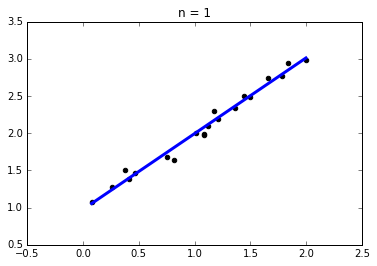

Coefficients: 2.1012 
Variance score: 0.99
Residual sum of squares: 6.69
Bias: 0.0428036794017
Variance: 6.63964913816


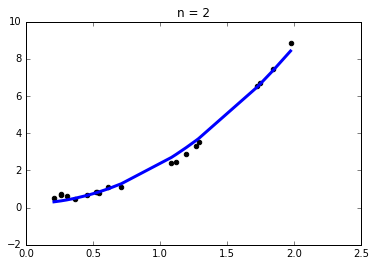

Coefficients: 2.4952 
Variance score: 0.99
Residual sum of squares: 17.89
Bias: 0.209072726222
Variance: 17.6687555574


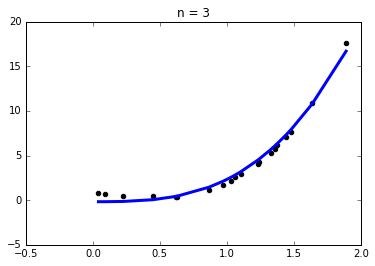

Coefficients: 2.7522 
Variance score: 1.00
Residual sum of squares: 140.93
Bias: 0.307331336685
Variance: 140.610569085


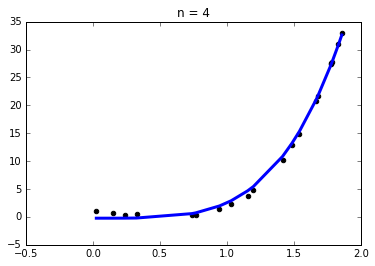

Coefficients: 2.8952 
Variance score: 1.00
Residual sum of squares: 521.07
Bias: 0.293292341563
Variance: 520.770696758


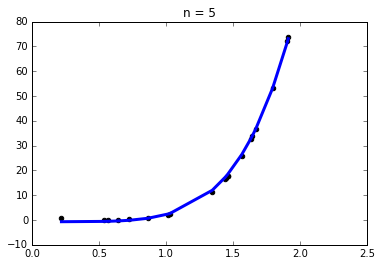

Coefficients: 2.9331 
Variance score: 1.00
Residual sum of squares: 1496.30
Bias: 0.430792760506
Variance: 1495.85953832


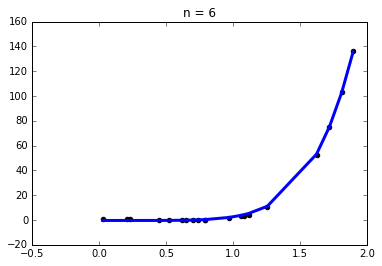

In [56]:
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression().fit(X,Y)

    # Compute the errors
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01 #0.01 is the irreducible error, is variance of the random error from above (sd**2)

    # Plot outputs
    # The coefficients
    print 'Coefficients:',
    for b in ['%.4f' % b for b in regr.coef_]: print b,
    # Explained variance score: 1 is perfect prediction
    print('\nVariance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, yhat, color='blue', linewidth=3)

    plt.title("n = " + str(i))
    plt.show()

# Advanced exercises (optional)

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

Coefficients: -0.2610 
Variance score: 0.58
Residual sum of squares: 0.41
Bias: 0.163551508125
Variance: 0.235677513112


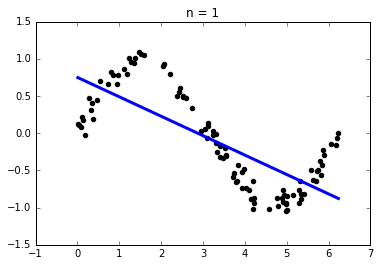

Coefficients: -0.2844 0.0038 
Variance score: 0.58
Residual sum of squares: 0.41
Bias: 0.163413103576
Variance: 0.235815917661


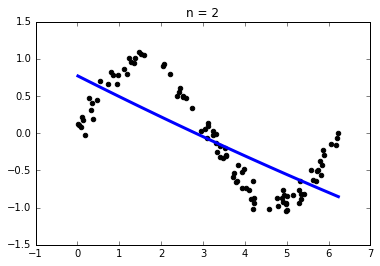

Coefficients: 1.7177 -0.8105 0.0867 
Variance score: 0.97
Residual sum of squares: 0.41
Bias: 0.00181182826786
Variance: 0.397417192969


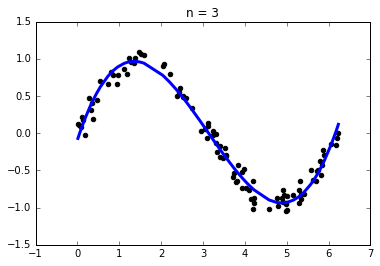

Coefficients: 1.7268 -0.8172 0.0884 -0.0001 
Variance score: 0.97
Residual sum of squares: 0.41
Bias: 0.00181067817547
Variance: 0.397418343062


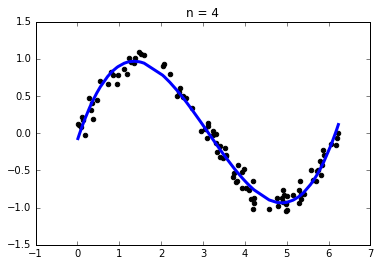

Coefficients: 0.9551 0.1015 -0.3087 0.0712 -0.0045 
Variance score: 0.98
Residual sum of squares: 0.41
Bias: -0.000956932334716
Variance: 0.400185953572


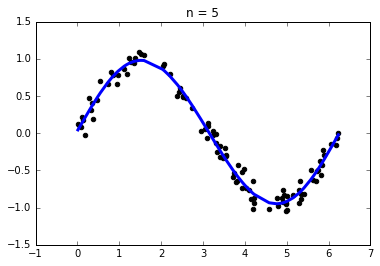

Coefficients: 0.8621 0.2571 -0.4088 0.1011 -0.0087 0.0002 
Variance score: 0.98
Residual sum of squares: 0.41
Bias: -0.000973410531043
Variance: 0.400202431768


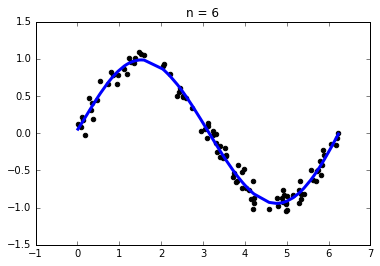

Coefficients: 0.5662 0.9205 -1.0041 0.3626 -0.0686 0.0071 -0.0003 
Variance score: 0.98
Residual sum of squares: 0.41
Bias: -0.00106859881936
Variance: 0.400297620056


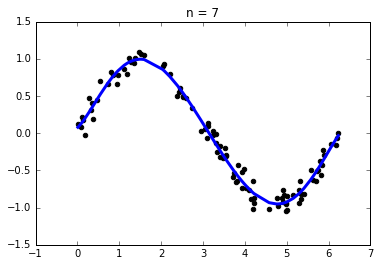

Coefficients: 0.5595 0.9411 -1.0294 0.3782 -0.0739 0.0081 -0.0004 0.0000 
Variance score: 0.98
Residual sum of squares: 0.41
Bias: -0.00106862776128
Variance: 0.400297648998


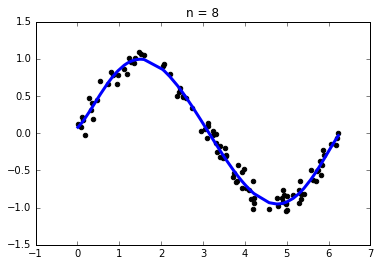

Coefficients: 0.8395 -0.1505 0.6812 -0.9874 0.5449 -0.1578 0.0257 -0.0022 0.0001 
Variance score: 0.98
Residual sum of squares: 0.41
Bias: -0.00109434793059
Variance: 0.400323369168


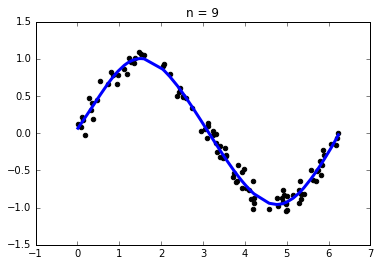

In [57]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    
    # Fit a polynomial of degree i to the data
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression().fit(X,Y)

    # Compute the errors
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01 #0.01 is the irreducible error, is variance of the random error from above (sd**2)

    # Plot outputs
    # The coefficients
    print 'Coefficients:',
    for b in ['%.4f' % b for b in regr.coef_]: print b,
    # Explained variance score: 1 is perfect prediction
    print('\nVariance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, yhat, color='blue', linewidth=3)

    plt.title("n = " + str(i))
    plt.show()

### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.


Coefficients: 60.6244 
Variance score: 0.70
Residual sum of squares: 19153.87
Bias: 5696.42096995
Variance: 13457.435693


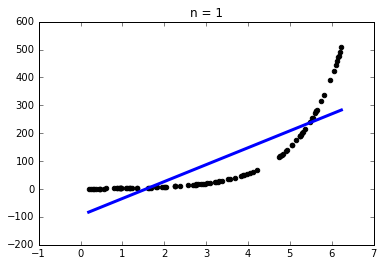

Coefficients: -91.9808 23.5576 
Variance score: 0.94
Residual sum of squares: 19153.87
Bias: 1133.67835726
Variance: 18020.1783057


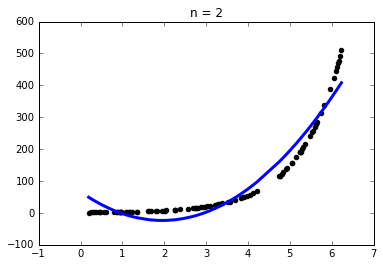

Coefficients: 88.5685 -46.0678 7.2356 
Variance score: 0.99
Residual sum of squares: 19153.87
Bias: 145.601965656
Variance: 19008.2546973


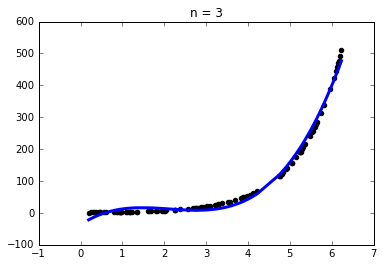

Coefficients: -44.1369 41.5143 -13.4311 1.5912 
Variance score: 1.00
Residual sum of squares: 19153.87
Bias: 9.71351926464
Variance: 19144.1431437


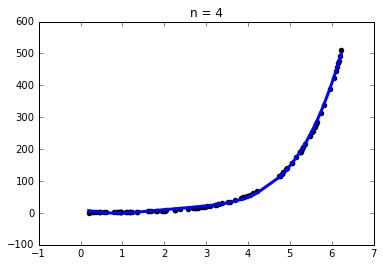

Coefficients: 21.0098 -25.4180 13.8154 -3.1421 0.2938 
Variance score: 1.00
Residual sum of squares: 19153.87
Bias: 0.540291419051
Variance: 19153.3163715


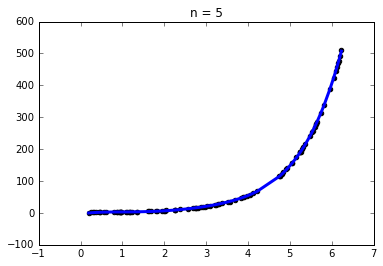

Coefficients: -7.4012 14.3362 -9.8618 3.6411 -0.6299 0.0480 
Variance score: 1.00
Residual sum of squares: 19153.87
Bias: 0.0243273272229
Variance: 19153.8323356


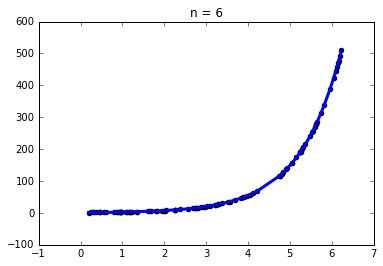

Coefficients: 3.4676 -4.8101 5.3247 -2.5674 0.7278 -0.1028 0.0067 
Variance score: 1.00
Residual sum of squares: 19153.87
Bias: 0.00147615702939
Variance: 19153.8551868


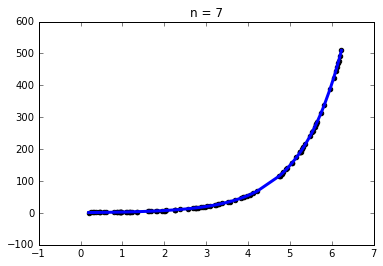

Coefficients: -1.8765 6.7564 -6.4658 3.9161 -1.3058 0.2608 -0.0278 0.0013 
Variance score: 1.00
Residual sum of squares: 19153.87
Bias: -0.00067136319718
Variance: 19153.8573343


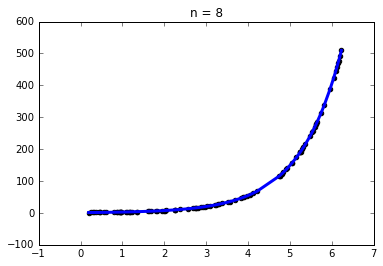

Coefficients: -2.1590 7.5057 -7.4302 4.6048 -1.5972 0.3354 -0.0391 0.0023 -0.0000 
Variance score: 1.00
Residual sum of squares: 19153.87
Bias: -0.00067522545738
Variance: 19153.8573382


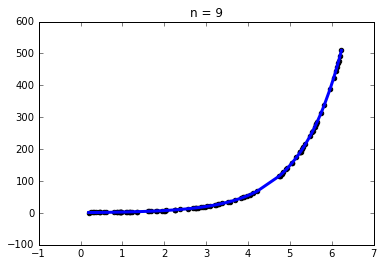

In [58]:
f = lambda x: math.exp(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    
    # Fit a polynomial of degree i to the data
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression().fit(X,Y)

    # Compute the errors
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01 #0.01 is the irreducible error, is variance of the random error from above (sd**2)

    # Plot outputs
    # The coefficients
    print 'Coefficients:',
    for b in ['%.4f' % b for b in regr.coef_]: print b,
    # Explained variance score: 1 is perfect prediction
    print('\nVariance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, yhat, color='blue', linewidth=3)

    plt.title("n = " + str(i))
    plt.show()

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?

Coefficients: 6.7695 
Variance score: 0.00
Residual sum of squares: 20182.93
Bias: 20131.8312406
Variance: 51.0931927804


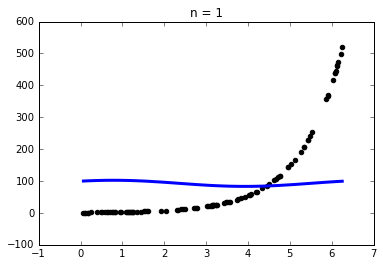

Coefficients: -96.9649 
Variance score: 0.21
Residual sum of squares: 20182.93
Bias: 16019.4975534
Variance: 4163.42687998


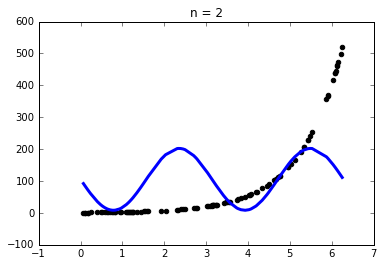

Coefficients: -6.9656 
Variance score: 0.01
Residual sum of squares: 20182.93
Bias: 20047.2405565
Variance: 135.683876905


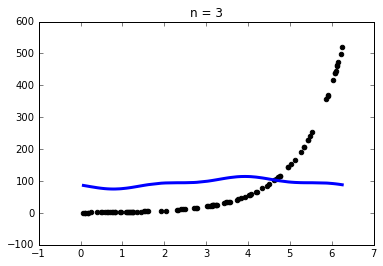

Coefficients: -46.9564 
Variance score: 0.22
Residual sum of squares: 20182.93
Bias: 15704.2578564
Variance: 4478.66657694


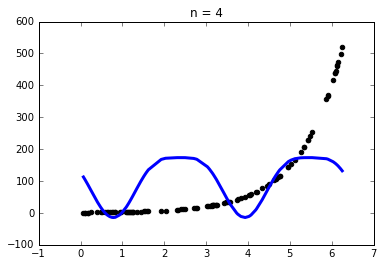

Coefficients: -6.5132 
Variance score: 0.02
Residual sum of squares: 20182.93
Bias: 19811.547866
Variance: 371.376567393


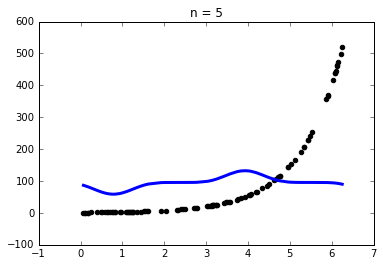

Coefficients: -21.9985 
Variance score: 0.20
Residual sum of squares: 20182.93
Bias: 16187.8999041
Variance: 3995.02452928


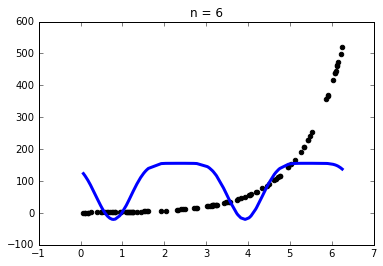

Coefficients: -3.9871 
Variance score: 0.02
Residual sum of squares: 20182.93
Bias: 19708.8063556
Variance: 474.118077813


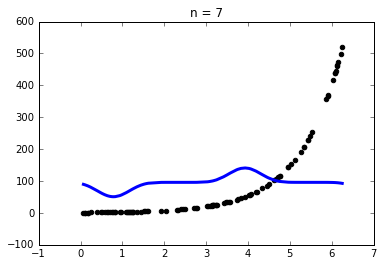

Coefficients: -10.3442 
Variance score: 0.17
Residual sum of squares: 20182.93
Bias: 16716.3799278
Variance: 3466.54450553


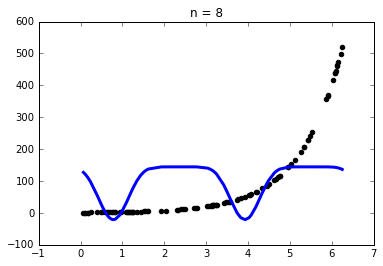

Coefficients: -2.1643 
Variance score: 0.02
Residual sum of squares: 20182.93
Bias: 19686.7033042
Variance: 496.221129131


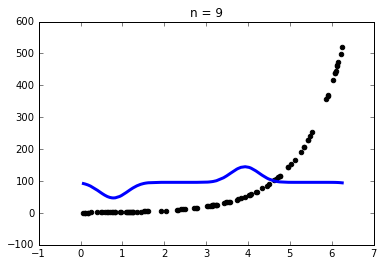

In [65]:
def sincos(X, degree=1):
    array = [X]
    y = [np.power(math.sin(x)+math.cos(x), degree) for x in X]
    #array.append(y)
    return np.array([y]).transpose()

# def polynomials(X, degree=1):
#     array = [X]
#     y = X
#     for i in range(2, int(degree + 1)):
#         y = y * X
#         array.append(y)
#     return np.array(array).transpose()

# def monomials(X, degree=1):
#     y = np.array(X)
#     y = np.power(X, degree)
#     return np.array([y]).transpose()

f = lambda x: math.exp(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    
    # Fit a polynomial of degree i to the data
    X = sincos(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression().fit(X,Y)

    # Compute the errors
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01 #0.01 is the irreducible error, is variance of the random error from above (sd**2)

    # Plot outputs
    # The coefficients
    print 'Coefficients:',
    for b in ['%.4f' % b for b in regr.coef_]: print b,
    # Explained variance score: 1 is perfect prediction
    print('\nVariance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, yhat, color='blue', linewidth=3)

    plt.title("n = " + str(i))
    plt.show()